In [1]:
"""
YOLOv8x Training Script for Bacteria Detection
----------------------------------------------
Author: [Your Name]
Description:
    Trains YOLOv8x on clinical microscopy dataset for E. coli & Salmonella detection.
    Optimized for 2x NVIDIA RTX A6000 GPUs.
"""

# === Imports ===
from ultralytics import YOLO
from pathlib import Path
import torch

# === Clear CUDA Cache (helps prevent memory fragmentation) ===
torch.cuda.empty_cache()

# === Paths ===
DATA_YAML = Path("/home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/data.yaml")
RESULTS_DIR = Path("/home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/results")
MODEL_WEIGHTS = "yolov8x.pt"  # Pretrained YOLOv8x checkpoint

# === Load Model ===
model = YOLO(MODEL_WEIGHTS)

# === Training Configuration ===
train_params = {
    "data": DATA_YAML,
    "epochs": 50,            # Enough for convergence on this dataset
    "imgsz": 640,            # Standard resolution for YOLOv8
    "batch": 16,             # Fits comfortably on 2x A6000 GPUs
    "device": 1,             # GPU ID (change to '0,1' for both GPUs if supported)
    "workers": 4,            # Data loading threads

    # --- Optimizer & Learning Rate ---
    "optimizer": "AdamW",    # Works well for microscopy tasks
    "lr0": 0.0015,            # Slightly higher initial LR for faster convergence
    "lrf": 0.1,               # Cosine decay final LR fraction
    "momentum": 0.9,
    "weight_decay": 0.0005,   # Light regularization to reduce overfitting

    # --- Warmup & Mosaic ---
    "warmup_epochs": 5,       # Gradual ramp-up for stability
    "warmup_bias_lr": 0.1,
    "close_mosaic": 10,       # Disable mosaic after 10 epochs (better for small objects)

    # --- Augmentations ---
    "mosaic": 1.0,            # Enable mosaic early
    "mixup": 0.0,             # Avoid MixUp (bad for small targets)
    "hsv_h": 0.015,           # Slight hue shift
    "hsv_s": 0.7,
    "hsv_v": 0.4,
    "degrees": 0,             # No major rotations
    "translate": 0.05,        # Small positional shift
    "scale": 0.7,              # Allow moderate zoom
    "shear": 0,
    "fliplr": 0.5,             # Horizontal flip (safe)
    "flipud": 0.0,             # No vertical flip

    # --- Early Stopping & Saving ---
    "patience": 50,           # Stop if no improvement for 50 epochs
    "save": True,
    "save_period": 10,        # Save model every 10 epochs
    "project": RESULTS_DIR,
    "name": "YOLOv8x_Bacteria_Detection",
    "exist_ok": True
}

# === Start Training ===
model.train(**train_params)


Ultralytics 8.3.121 🚀 Python-3.12.8 torch-2.2.0+cu118 CUDA:1 (NVIDIA RTX A6000, 48676MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=1, workers=4, project=/home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/results, name=YOLOv8x_Bacteria_Detection, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_ma

/opt/Anaconda3-2023.03/envs/siu856582712@ad.siu.edu/lib/python3.12/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

train: Scanning /home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/train/labels.cache... 4203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4203/4203 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 89.9±58.2 MB/s, size: 97.8 KB)


val: Scanning /home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/valid/labels.cache... 1201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1201/1201 [00:00<?, ?it/s]


Plotting labels to /home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/results/YOLOv8x_Bacteria_Detection/labels.jpg... 
optimizer: AdamW(lr=0.0015, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/results/YOLOv8x_Bacteria_Detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      12.5G      1.458      1.505      1.254         42        640: 100%|██████████| 263/263 [01:31<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.02it/s]

                   all       1201       2298      0.613      0.658      0.687      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      14.4G      1.427      1.182      1.244         47        640: 100%|██████████| 263/263 [01:30<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.93it/s]


                   all       1201       2298      0.523      0.621      0.577      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      14.4G      1.412      1.159      1.235         41        640: 100%|██████████| 263/263 [01:30<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]

                   all       1201       2298      0.678      0.723      0.758      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      14.4G      1.384      1.092      1.222         40        640: 100%|██████████| 263/263 [01:29<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.94it/s]

                   all       1201       2298      0.689      0.734       0.78      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      14.4G      1.387       1.06      1.225         16        640: 100%|██████████| 263/263 [01:30<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.98it/s]

                   all       1201       2298      0.682      0.671      0.732      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      14.4G      1.354      1.034      1.193         26        640: 100%|██████████| 263/263 [01:30<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.99it/s]

                   all       1201       2298      0.715      0.765      0.802        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      14.4G      1.356      1.003      1.195         31        640: 100%|██████████| 263/263 [01:31<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.86it/s]

                   all       1201       2298      0.692      0.753      0.794      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      14.4G      1.335     0.9722      1.188         45        640: 100%|██████████| 263/263 [01:30<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1201       2298      0.741      0.761      0.834      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      14.4G      1.319     0.9286      1.184         23        640: 100%|██████████| 263/263 [01:30<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.00it/s]

                   all       1201       2298      0.715      0.775      0.814      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      14.4G      1.304     0.9125       1.17         36        640: 100%|██████████| 263/263 [01:29<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.705      0.775      0.799      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      14.4G      1.305     0.8922      1.173         56        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.08it/s]

                   all       1201       2298      0.801      0.765       0.85      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      14.4G      1.303     0.8858      1.177         43        640: 100%|██████████| 263/263 [01:28<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.712      0.794      0.828      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      14.4G      1.289     0.8843       1.18         18        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.766       0.76      0.823      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      14.4G      1.272     0.8523       1.17         31        640: 100%|██████████| 263/263 [01:28<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.729      0.803      0.852      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      14.4G       1.27     0.8706      1.156         39        640: 100%|██████████| 263/263 [01:28<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.08it/s]

                   all       1201       2298      0.773      0.784      0.856      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      14.4G      1.264     0.8463      1.159         51        640: 100%|██████████| 263/263 [01:28<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.08it/s]

                   all       1201       2298      0.758      0.777      0.855      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      14.4G      1.248     0.8267      1.157         44        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.746      0.801      0.848      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      14.4G       1.24     0.8292      1.143         29        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.751      0.778      0.843      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      14.4G      1.254      0.818      1.158         38        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]

                   all       1201       2298      0.772      0.792      0.847      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      14.4G      1.248     0.8093      1.158         44        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.773      0.809      0.866      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      14.4G      1.234     0.7994       1.14         43        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.743      0.822      0.857      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      14.4G      1.234     0.7817      1.149         53        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.741      0.811      0.853      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      14.4G      1.229     0.7752      1.144         35        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.768      0.783      0.852      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      14.4G      1.207     0.7749      1.128         36        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.757      0.814      0.867      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      14.4G      1.227     0.7712      1.139         24        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.777      0.796      0.866       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      14.4G      1.212     0.7534       1.14         43        640: 100%|██████████| 263/263 [01:29<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]

                   all       1201       2298      0.748       0.83      0.868      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      14.4G      1.199      0.733      1.124         30        640: 100%|██████████| 263/263 [01:29<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.779      0.792      0.861      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      14.4G      1.198     0.7361      1.131         22        640: 100%|██████████| 263/263 [01:29<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.01it/s]

                   all       1201       2298      0.776      0.816      0.871       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      14.4G      1.195     0.7332      1.129         27        640: 100%|██████████| 263/263 [01:30<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.07it/s]

                   all       1201       2298      0.779      0.833      0.879      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      14.4G      1.193     0.7275      1.125         25        640: 100%|██████████| 263/263 [01:30<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.01it/s]

                   all       1201       2298      0.776      0.809      0.872      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      14.4G      1.181      0.712      1.119         30        640: 100%|██████████| 263/263 [01:29<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.08it/s]

                   all       1201       2298      0.781      0.811      0.871      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      14.4G      1.183     0.7131      1.121         33        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.08it/s]

                   all       1201       2298      0.798      0.816      0.888      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      14.4G      1.171     0.7027      1.119         35        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.786      0.812      0.876      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      14.4G      1.169     0.7011      1.117         28        640: 100%|██████████| 263/263 [01:28<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]

                   all       1201       2298      0.801      0.807      0.873      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      14.4G      1.168     0.6913      1.108         39        640: 100%|██████████| 263/263 [01:28<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]

                   all       1201       2298      0.748      0.854      0.881      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      14.4G      1.174     0.6963      1.113         34        640: 100%|██████████| 263/263 [01:28<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.787      0.831      0.884      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      14.4G      1.161     0.6719      1.114         39        640: 100%|██████████| 263/263 [01:28<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]

                   all       1201       2298      0.769      0.821      0.872      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      14.4G      1.159     0.6703      1.115         39        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]

                   all       1201       2298      0.799       0.83      0.886      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      14.4G      1.151     0.6736      1.105         34        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.03it/s]

                   all       1201       2298      0.802      0.825      0.886      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      14.4G      1.137     0.6562      1.095         33        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]

                   all       1201       2298        0.8      0.827       0.89      0.586


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      14.4G      1.153     0.6435      1.205         36        640: 100%|██████████| 263/263 [01:28<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.08it/s]

                   all       1201       2298      0.783      0.835      0.889       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      14.4G      1.133      0.634      1.199         16        640: 100%|██████████| 263/263 [01:28<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298       0.78       0.85      0.891      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      14.4G      1.132     0.6186      1.198         20        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.796      0.833      0.892      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      14.4G      1.127     0.6192      1.197         15        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.793      0.857      0.894      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      14.4G      1.119     0.6085      1.186         20        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]

                   all       1201       2298      0.792      0.849      0.887      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      14.4G      1.119     0.5974      1.191         16        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.806      0.837      0.894      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      14.4G      1.112     0.5867      1.193         18        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]

                   all       1201       2298      0.798      0.838      0.894      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      14.4G      1.105     0.5773       1.18         30        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.799      0.838      0.895        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      14.4G      1.089     0.5748      1.179         25        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]

                   all       1201       2298       0.81      0.835      0.889      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      14.4G      1.094     0.5715      1.188         28        640: 100%|██████████| 263/263 [01:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1201       2298      0.805      0.838      0.891      0.599



50 epochs completed in 1.379 hours.
Optimizer stripped from /home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/results/YOLOv8x_Bacteria_Detection/weights/last.pt, 136.7MB
Optimizer stripped from /home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/results/YOLOv8x_Bacteria_Detection/weights/best.pt, 136.7MB

Validating /home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/results/YOLOv8x_Bacteria_Detection/weights/best.pt...
Ultralytics 8.3.121 🚀 Python-3.12.8 torch-2.2.0+cu118 CUDA:1 (NVIDIA RTX A6000, 48676MiB)
Model summary (fused): 112 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.11it/s]


                   all       1201       2298        0.8      0.837      0.895        0.6
        negative_cocci        452        673      0.804      0.881      0.923      0.691
        positive_cocci        183        274      0.815       0.79      0.891      0.565
      negative_bacilli        734       1150      0.877      0.896      0.953      0.633
      positive_bacilli        147        201      0.702      0.781      0.813      0.509
Speed: 0.1ms preprocess, 6.2ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/results/YOLOv8x_Bacteria_Detection


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fed233a68d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [1]:
"""
YOLOv8x Model Testing on Clinical Dataset
------------------------------------------
Author: [Your Name]
Description:
    Loads the best-trained YOLOv8x model and evaluates it on the test split.
    Generates prediction images, evaluation metrics, and performance plots.
"""

from ultralytics import YOLO
from pathlib import Path
import torch

# === Clear any leftover GPU memory ===
torch.cuda.empty_cache()

# === Paths ===
MODEL_PATH = Path("/home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/results/YOLOv8x_Bacteria_Detection/weights/best.pt")
DATA_YAML = Path("/home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/data.yaml")

# === Load Trained Model ===
model = YOLO(MODEL_PATH)

# === Validation Configuration ===
val_params = {
    "data": DATA_YAML,     # Dataset config
    "split": "test",       # Validate on test set
    "imgsz": 640,          # Image size used during training
    "batch": 16,           # Batch size (same as training for consistency)
    "device": 1,           # GPU ID to use (change to '0,1' for multi-GPU)
    
    # --- Inference & Thresholds ---
    "conf": 0.2,           # Low threshold to see all detections
    "iou": 0.45,           # Standard for mAP@0.5
    
    # --- Performance Optimization ---
    "half": True,          # Use FP16 for speed & VRAM savings
    
    # --- Output & Logging ---
    "save": True,          # Save prediction images
    "save_txt": False,     # Skip saving label-format predictions
    "verbose": True,       # Print detailed evaluation results
    "plots": True          # Save PR curve, confusion matrix, etc.
}

# === Run Validation ===
metrics = model.val(**val_params)

# === Display Metrics in Console ===
print("\n=== Evaluation Results ===")
print(metrics)


Ultralytics 8.3.123 🚀 Python-3.12.8 torch-2.2.0+cu118 CUDA:1 (NVIDIA RTX A6000, 48676MiB)
Model summary (fused): 112 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs
val: Fast image access ✅ (ping: 0.2±0.2 ms, read: 244.6±60.3 MB/s, size: 102.3 KB)


val: Scanning /home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/test/labels... 601 images, 0 backgrounds, 0 corrupt: 100%|██████████| 601/601 [00:00<00:00, 3047.59it/s]


val: New cache created: /home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:04<00:00,  7.76it/s]


                   all        601       1239      0.799      0.868      0.895      0.634
        negative_cocci        223        328      0.792       0.89      0.902      0.708
        positive_cocci         96        163      0.783      0.834      0.905      0.634
      negative_bacilli        356        596      0.842      0.896      0.928      0.639
      positive_bacilli         96        152      0.778      0.853      0.843      0.553
Speed: 0.1ms preprocess, 6.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val13
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f60a1d2eed0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,   

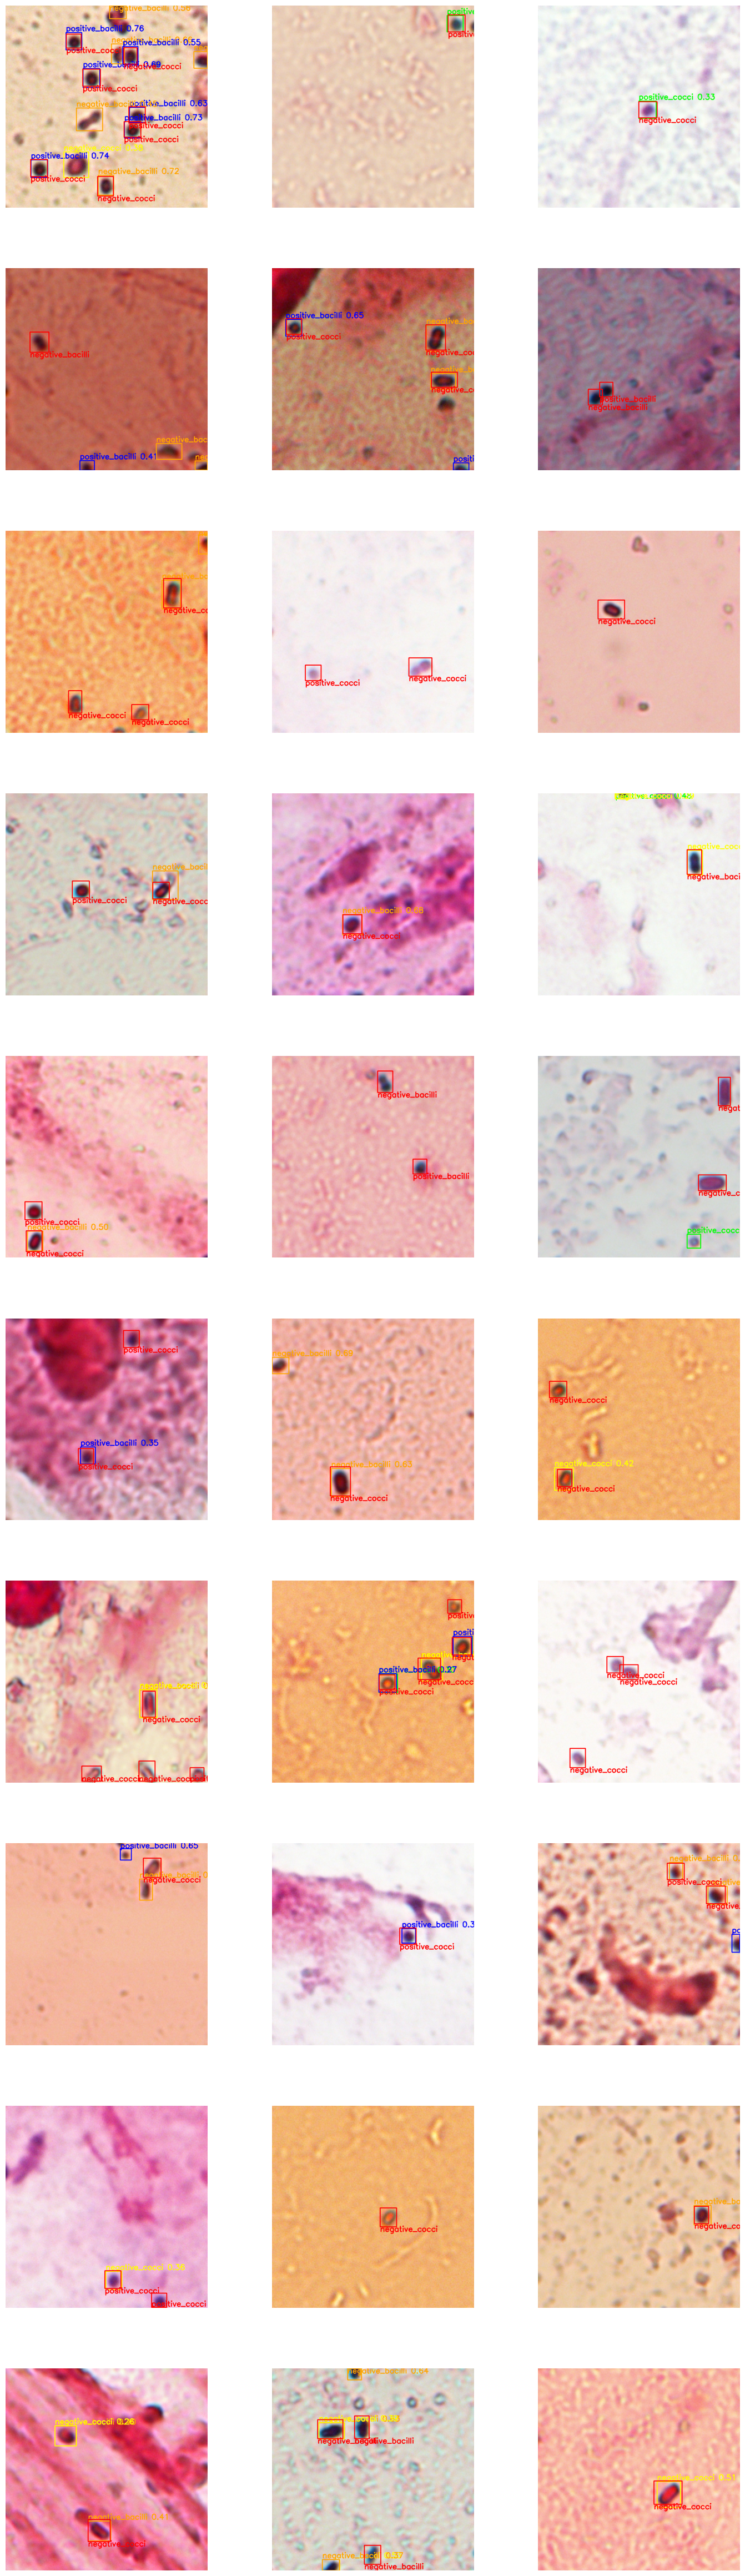

In [9]:
# ✅ Inline plots for Jupyter
%matplotlib inline

# === Imports ===
import os
import glob
import math
import random
from pathlib import Path

import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
import logging

# === Quieter logs & clean VRAM ===
logging.getLogger("ultralytics").setLevel(logging.ERROR)
torch.cuda.empty_cache()

# === Config ===
TEST_IMAGES_DIR = Path("/home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/test/images")
MODEL_PATH = Path("/home/siu856582712/Documents/dataset/clinical_datset/last_clinical_DS/orginal/results/YOLOv8x_Bacteria_Detection/weights/best.pt")

# How many images to show. You can set either N_SAMPLES or FRACTION; if both set, N_SAMPLES wins.
N_SAMPLES = 30                # e.g., 30 images
FRACTION = None               # e.g., 0.5 for 50% of images
GRID_COLS = 3                 # images per row
SEED = 42                     # for reproducibility; set to None for fully random
CONF_THRESH = 0.001           # low to visualize almost everything; filtering happens via score display
IOU_MATCH_THR = 0.5           # match pred to GT if IoU >= 0.5
DRAW_GT = True                # draw ground-truth boxes if labels exist

# === Load model ===
model = YOLO(str(MODEL_PATH))

# If model has class names, use them; else fallback to your known list.
CLASS_NAMES = None
try:
    if hasattr(model.model, "names"):
        CLASS_NAMES = list(model.model.names.values())
except Exception:
    pass
if CLASS_NAMES is None:
    CLASS_NAMES = ["positive_cocci", "positive_bacilli", "negative_cocci", "negative_bacilli"]

# Consistent colors per class (BGR for cv2)
CLASS_COLORS = {
    "positive_cocci": (0, 255, 0),
    "positive_bacilli": (0, 0, 255),
    "negative_cocci": (255, 255, 0),
    "negative_bacilli": (255, 165, 0),
}
GT_COLOR = (255, 0, 0)  # blue for ground truth


# === Utilities ===
def list_images(folder: Path):
    exts = ("*.jpg", "*.jpeg", "*.png", "*.bmp", "*.tif", "*.tiff")
    files = []
    for ext in exts:
        files.extend(folder.glob(ext))
    return sorted(map(str, files))

def choose_subset(files, n_samples=None, fraction=None, seed=None):
    if not files:
        return []
    rnd = random.Random(seed)
    if n_samples is not None:
        n = min(n_samples, len(files))
    elif fraction is not None:
        n = max(1, int(round(len(files) * float(fraction))))
    else:
        n = len(files)
    return rnd.sample(files, n)

def yolo_label_path(img_path: str) -> str:
    # swap /images/ -> /labels/ and extension -> .txt
    return img_path.replace("/images/", "/labels/").rsplit(".", 1)[0] + ".txt"

def read_yolo_labels(label_path: str, img_w: int, img_h: int):
    """Read YOLO txt labels (cx,cy,w,h normalized) -> pixel xywh list, class_ids list."""
    boxes, class_ids = [], []
    if not os.path.exists(label_path):
        return boxes, class_ids
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 5:
                continue
            cls = int(parts[0])
            cx, cy, w, h = map(float, parts[1:5])
            boxes.append([cx * img_w, cy * img_h, w * img_w, h * img_h])
            class_ids.append(cls)
    return boxes, class_ids

def xywh_to_xyxy(box):
    cx, cy, w, h = box
    x1 = int(round(cx - w / 2))
    y1 = int(round(cy - h / 2))
    x2 = int(round(cx + w / 2))
    y2 = int(round(cy + h / 2))
    return x1, y1, x2, y2

def clip_box(x1, y1, x2, y2, w, h):
    return max(0, x1), max(0, y1), min(w - 1, x2), min(h - 1, y2)

def iou_xyxy(a, b):
    ax1, ay1, ax2, ay2 = a
    bx1, by1, bx2, by2 = b
    inter_x1, inter_y1 = max(ax1, bx1), max(ay1, by1)
    inter_x2, inter_y2 = min(ax2, bx2), min(ay2, by2)
    iw, ih = max(0, inter_x2 - inter_x1 + 1), max(0, inter_y2 - inter_y1 + 1)
    inter = iw * ih
    area_a = max(0, ax2 - ax1 + 1) * max(0, ay2 - ay1 + 1)
    area_b = max(0, bx2 - bx1 + 1) * max(0, by2 - by1 + 1)
    union = area_a + area_b - inter
    return inter / union if union > 0 else 0.0

def draw_detections(img, preds_xywh, preds_cls, preds_conf, gts_xywh=None, gts_cls=None):
    """
    Draw predictions and (optionally) unmatched GTs.
    - Predictions: colored by class, label includes conf.
    - GT: blue boxes with class name.
    Matching uses IoU >= IOU_MATCH_THR and same class.
    """
    h, w = img.shape[:2]

    # Convert to xyxy and clip
    preds_xyxy = [clip_box(*xywh_to_xyxy(b), w, h) for b in preds_xywh]
    gts_xyxy = [clip_box(*xywh_to_xyxy(b), w, h) for b in (gts_xywh or [])]

    matched_gt = set()

    # Draw predictions
    for (px1, py1, px2, py2), cls_id, conf in zip(preds_xyxy, preds_cls, preds_conf):
        cls_name = CLASS_NAMES[cls_id] if cls_id < len(CLASS_NAMES) else str(cls_id)
        color = CLASS_COLORS.get(cls_name, (0, 255, 255))  # fallback color

        # Try to match with a GT of the same class
        best_iou, best_gt_idx = 0.0, -1
        if gts_xyxy and gts_cls:
            for gi, (gx1, gy1, gx2, gy2) in enumerate(gts_xyxy):
                if gi in matched_gt or gts_cls[gi] != cls_id:
                    continue
                iou = iou_xyxy((px1, py1, px2, py2), (gx1, gy1, gx2, gy2))
                if iou > best_iou:
                    best_iou, best_gt_idx = iou, gi
            if best_iou >= IOU_MATCH_THR:
                matched_gt.add(best_gt_idx)

        # Draw prediction box
        cv2.rectangle(img, (px1, py1), (px2, py2), color, 2)
        label = f"{cls_name} {conf:.2f}"
        cv2.putText(img, label, (px1, max(py1 - 6, 12)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2, cv2.LINE_AA)

    # Draw unmatched GT boxes (optional)
    if DRAW_GT and gts_xyxy and gts_cls:
        for gi, (gx1, gy1, gx2, gy2) in enumerate(gts_xyxy):
            if gi in matched_gt:
                continue
            cls_id = gts_cls[gi]
            cls_name = CLASS_NAMES[cls_id] if cls_id < len(CLASS_NAMES) else str(cls_id)
            cv2.rectangle(img, (gx1, gy1), (gx2, gy2), GT_COLOR, 2)
            cv2.putText(img, f"GT {cls_name}", (gx1, min(gy2 + 18, h - 5)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, GT_COLOR, 2, cv2.LINE_AA)

    return img


# === Collect & sample images ===
all_images = list_images(TEST_IMAGES_DIR)
if not all_images:
    raise FileNotFoundError(f"No images found in: {TEST_IMAGES_DIR}")

image_paths = choose_subset(all_images, n_samples=N_SAMPLES, fraction=FRACTION, seed=SEED)

# === Build grid ===
n = len(image_paths)
cols = GRID_COLS
rows = math.ceil(n / cols)
plt.figure(figsize=(6 * cols, 6 * rows))

# === Inference & plotting ===
for i, img_path in enumerate(image_paths, start=1):
    # Read image (BGR->RGB)
    bgr = cv2.imread(img_path)
    if bgr is None:
        continue
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    h, w = rgb.shape[:2]

    # Predict (no grad for speed)
    with torch.no_grad():
        res = model(rgb, conf=CONF_THRESH, verbose=False)[0]

    # Predictions (xywh are in pixels)
    preds_xywh = res.boxes.xywh.cpu().numpy() if res.boxes.xywh is not None else []
    preds_cls = res.boxes.cls.cpu().numpy().astype(int) if res.boxes.cls is not None else []
    preds_conf = res.boxes.conf.cpu().numpy() if res.boxes.conf is not None else []

    # Ground truth (if exists)
    label_file = yolo_label_path(img_path)
    gts_xywh, gts_cls = read_yolo_labels(label_file, w, h)

    # Draw
    vis = draw_detections(rgb.copy(), preds_xywh, preds_cls, preds_conf, gts_xywh, gts_cls)

    # Resize for a uniform grid view (optional)
    vis = cv2.resize(vis, (640, 640), interpolation=cv2.INTER_AREA)

    # Plot
    ax = plt.subplot(rows, cols, i)
    ax.imshow(vis)
    ax.set_title(Path(img_path).name, fontsize=9)
    ax.axis("off")

plt.tight_layout(w_pad=0.1, h_pad=0.3)
plt.show()
